In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import time

import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data into a DataFrame
data_1 = pd.read_csv('Data/car_v4_features_nocorr.csv', index_col=0)
data_1.head()

,Tot Dom Deposits to Tot Assets,Return On Assets,Assets per Emp,Yield on Earning Assets,Net Loans Lease to Tot Assets,RE to Ave Equity,Efficiency Ratio,Core Capital Ratio,Noncurr Assets Other RE,Cost of Funding Earnings Assets,Number Employees,Return on Equity
0,83.780647,1.029656,7.163125,4.147104,72.983451,7.269763,63.309659,13.232286,1.740395,0.276009,48.0,7.269763
1,78.517547,0.421804,5.589833,4.588862,85.288768,4.134866,84.675615,10.381301,3.227089,0.990295,18.0,4.134866
5,87.746504,0.418284,6.355125,3.809205,66.418442,4.192961,84.074994,10.240668,0.889046,0.201163,40.0,4.192961
6,88.996598,1.363659,4.948537,5.052532,68.994004,1.950040,63.715077,9.843739,0.633083,0.106564,67.0,13.002251
7,78.461749,0.270732,3.903133,3.039465,43.421525,3.180418,88.078704,8.733587,0.362102,0.228479,15.0,3.180418


### Data normalization (standarization)

### Option 1
Data don't follow the same scale, so we can standarize the data to show all data with the same scale.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

http://scikit-learn.org/stable/modules/preprocessing.html

First separate numeric and string columns:

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = data_1.select_dtypes(include=numerics)
print('Numeric columns: {}'.format(numeric_cols.columns))

# string_cols = df.select_dtypes(exclude=numerics)
# print('String columns: {}'.format(string_cols.columns))

Numeric columns: Index(['Tot Dom Deposits to Tot Assets', 'Return On Assets', 'Assets per Emp',
       'Yield on Earning Assets', 'Net Loans Lease to Tot Assets',
       'RE to Ave Equity', 'Efficiency Ratio', 'Core Capital Ratio',
       'Noncurr Assets Other RE', 'Cost of Funding Earnings Assets',
       'Number Employees', 'Return on Equity'],
      dtype='object')


Scale numeric columns using the following formula on numeric columns: $$ \frac{(X_i - \mu)}{\sigma} $$

In [4]:
data_1_norm = (numeric_cols - numeric_cols.mean()) / numeric_cols.std() 

data_1_norm.head()

,Tot Dom Deposits to Tot Assets,Return On Assets,Assets per Emp,Yield on Earning Assets,Net Loans Lease to Tot Assets,RE to Ave Equity,Efficiency Ratio,Core Capital Ratio,Noncurr Assets Other RE,Cost of Funding Earnings Assets,Number Employees,Return on Equity
0,-0.063660,-0.142231,0.775976,-0.306995,0.391187,0.277011,-0.306280,1.049528,1.683162,-1.044793,-0.363146,-0.662043
1,-1.056701,-1.426153,0.099570,0.427399,1.261524,-0.444922,1.496331,-0.291592,3.992582,1.586346,-0.560636,-1.355941
5,0.684617,-1.433588,0.428592,-0.868731,-0.073146,-0.431544,1.445658,-0.357747,0.360683,-1.320496,-0.415810,-1.343082
6,0.920484,0.563258,-0.176143,1.198220,0.109019,-0.948064,-0.272075,-0.544464,-0.036928,-1.668959,-0.238069,0.606822
7,-1.067229,-1.745249,-0.625594,-2.148373,-1.699684,-0.664722,1.783444,-1.066686,-0.457868,-1.219875,-0.580385,-1.567204


### Boxplots

First plot using the normal data, without standarization:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

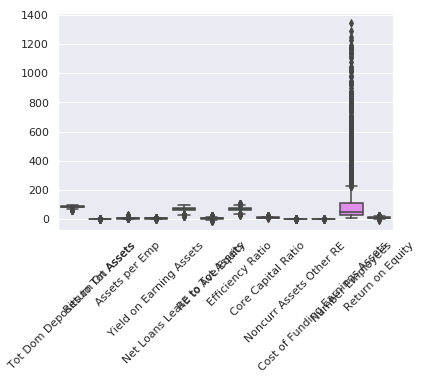

In [5]:
sns.boxplot(data=data_1[:-1])
plt.xticks(rotation=45)

Now plot the same boxplots using the standarized data. With the normalized data we have now uniform ranges of data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

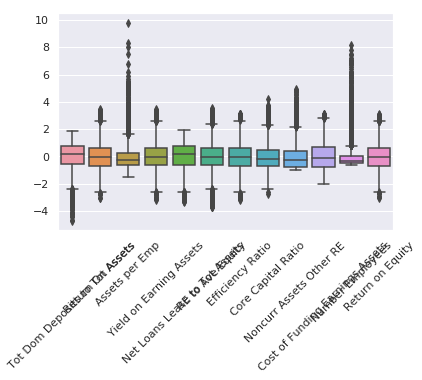

In [6]:
sns.boxplot(data=data_1_norm)
plt.xticks(rotation=45)

### Target TotalDelay distribution

We can plot target column distribution:

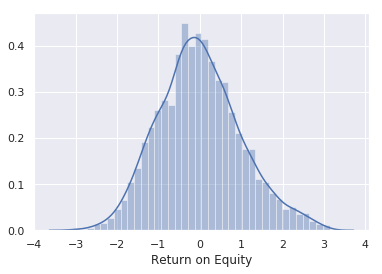

In [7]:
sns.distplot(data_1_norm['Return on Equity'])

### Visualize the relationship between the features and the response using scatterplots

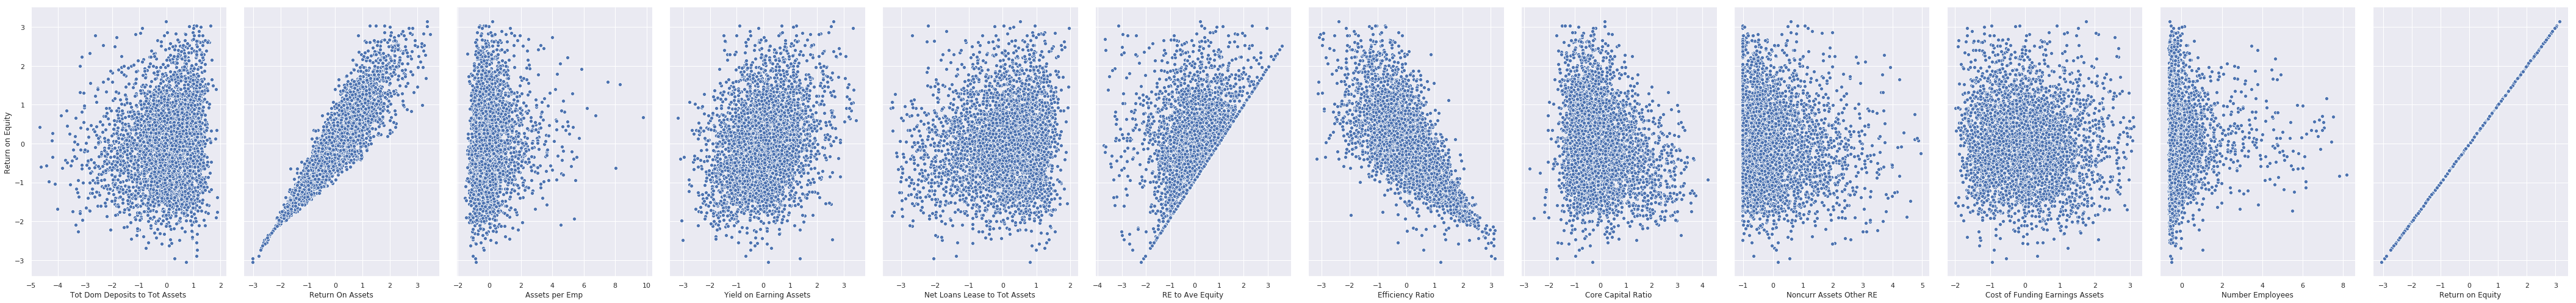

In [9]:
sns.pairplot(data_1_norm, x_vars=['Tot Dom Deposits to Tot Assets', 'Return On Assets', 'Assets per Emp',
       'Yield on Earning Assets', 'Net Loans Lease to Tot Assets',
       'RE to Ave Equity', 'Efficiency Ratio', 'Core Capital Ratio',
       'Noncurr Assets Other RE', 'Cost of Funding Earnings Assets',
       'Number Employees', 'Return on Equity'], y_vars='Return on Equity', size=7, aspect=0.7)

### Correlations

We can see if any column is highly correlated with other column:

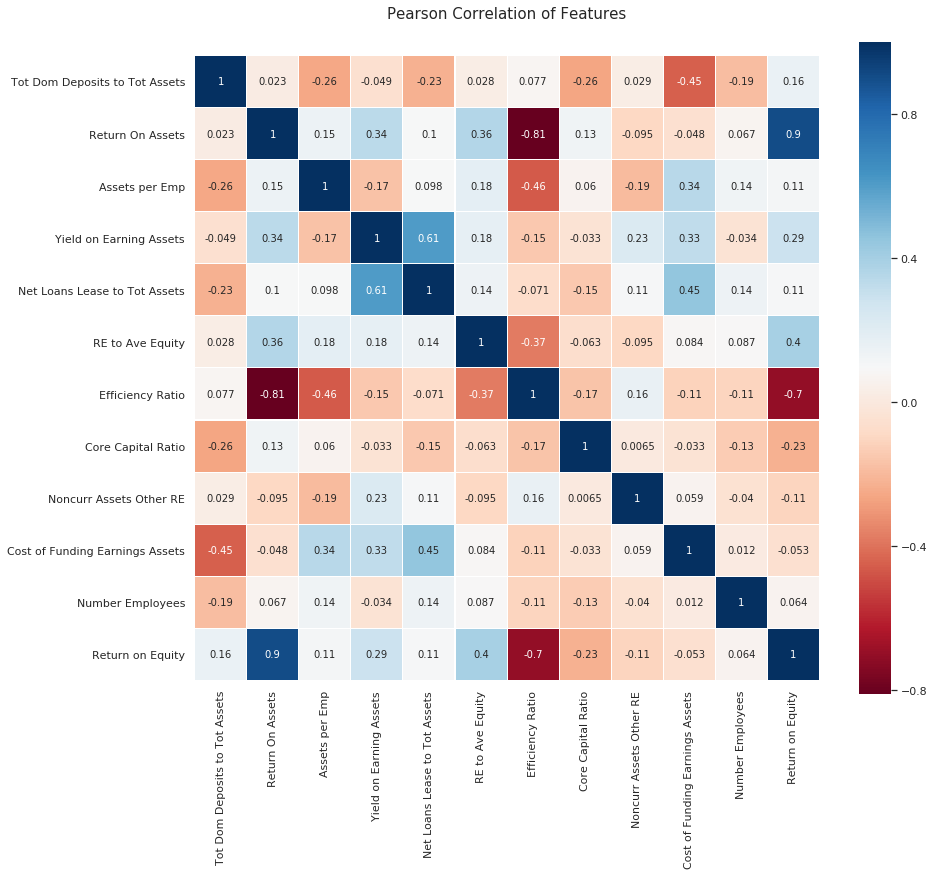

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_1_norm.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

# Modeling

Now we will build models that forecast the _Return on Equity_ using **Scikit Learn (sklearn)**.

## Train/test partitions

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" width=400></img>

- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [11]:
variables = data_1_norm.columns[ : -1]
X = data_1_norm[variables].values

target = data_1_norm.columns[-1]
Y = data_1_norm[target].values

X[1]

array([-1.05670106, -1.4261528 ,  0.09957003,  0.42739871,  1.2615236 ,
       -0.44492231,  1.49633141, -0.29159163,  3.99258158,  1.58634629,
       -0.56063626])

### Standarize the data (_StandardScaler_)

sklearn provides a method to standarize and scale data. This function applies the same formula we used before, $ \frac{(X_i - \mu)}{\sigma} $.

This _StandardScaler_ method receives as input an array, not a dataframe.

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [12]:
from sklearn.preprocessing import StandardScaler

variables = data_1_norm.columns[ : -1]
X = data_1_norm[variables].values

target = data_1_norm.columns[-1]
Y = data_1_norm[target].values

X[1]

ss = StandardScaler()

X = ss.fit_transform(X)
X[1]

array([-1.05683131, -1.4263286 ,  0.0995823 ,  0.42745139,  1.26167911,
       -0.44497715,  1.49651585, -0.29162758,  3.99307374,  1.58654183,
       -0.56070536])

### Make partitions

We can use the <i>train_test_split</i> function in order to make the split. The _test_size=0.2_ inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [13]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #0.3

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3245, 11) (3245,)
(812, 11) (812,)


## What is Overfitting/Underfitting a Model?

### Overfitting

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data.

### Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data.

<img src="https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png"></img>

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## Multiple Linear Regression

$$ y=β0+β1x1+...+βnxn $$
$$ y=β0+β1×TV+β2×Return on Assets+β3×Pretax ROA $$

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('b: {}'.format(lr.intercept_))
print('a Coefficients: \n', lr.coef_)

b: 0.002260250480509783
a Coefficients: 
 [ 0.03620604  0.99782235 -0.00552309 -0.05815198 -0.01144261  0.04296463
  0.04293827 -0.3481272  -0.00538909  0.02795284 -0.03898123]


Now show the values of each $a$ _coeficient_ of our regression:

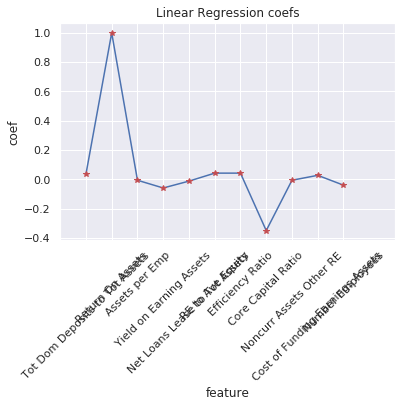

In [16]:
nticks_coefs = len(data_1_norm.columns) - 1

plt.title('Linear Regression coefs')
plt.xlabel('feature')
plt.ylabel('coef')
plt.xlim(-1, nticks_coefs + 1)
#plt.ylim(-1., 1.)
plt.xticks(range(nticks_coefs), variables, rotation=45)
_ = plt.plot(lr.coef_.reshape(X.shape[1]), '-', lr.coef_.reshape(X.shape[1]), 'r*')

> The plot shows the importance of each variable to predict **Return on Equity**.

Mean Absolute Error (MAE): 0.17552865563168307
Variance score (R^2): 0.9395131847189104


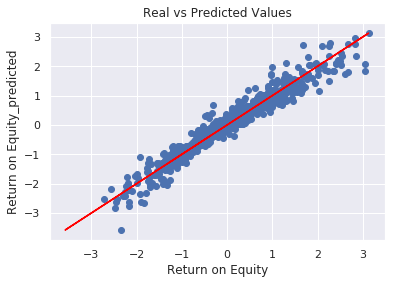

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score

Y_pred = lr.predict(X_test)

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('Return on Equity')
plt.ylabel('Return on Equity_predicted')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')

> The closer blue points are to the red line, the better our prediction is.

### Cross Validation

There you go! Here is a summary of what I did: I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. Seems good, right? But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

We get a more realistic evaluation through **Cross Validation**.

It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

<img src="https://cdn-images-1.medium.com/max/2000/1*4G__SV580CxFj78o9yUXuQ.png" width=600></img>

### K-Folds Cross Validation

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

<img src="https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png" width=600></img>

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn-model-selection-kfold

In [18]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(lr, X_test, Y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))

MAE: [0.18562753 0.17337274 0.17852449]
MAE_mean: 0.17917491975487523


In [19]:
results = pd.DataFrame({
    'Real Length': Y_test,
    'Predicted Length': Y_pred,
    'Difference': np.abs(Y_test - Y_pred)
}, columns=['Real Length', 'Predicted Length', 'Difference'])

results

,Real Length,Predicted Length,Difference
0,-1.095545,-1.297087,0.201542
1,0.232314,0.243641,0.011327
2,-0.575389,-0.591265,0.015876
3,1.225098,1.065487,0.159612
4,0.489646,0.189354,0.300292
5,-0.930514,-0.784322,0.146192
6,-1.306427,-1.548487,0.242060
7,-1.145536,-0.935333,0.210203
8,0.965255,0.936991,0.028263
9,-0.238621,-0.225031,0.013590


In [20]:
lr.score(X_test, Y_test)

0.9395131847189104

In [21]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

0.24857431609836733